In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_curve, auc

df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/NASA%20-%20Nearest%20Earth%20Objects/neo_v2.csv")

In [44]:
print(len(df))
df.columns

90836


Index(['id', 'name', 'est_diameter_min', 'est_diameter_max',
       'relative_velocity', 'miss_distance', 'orbiting_body', 'sentry_object',
       'absolute_magnitude', 'hazardous'],
      dtype='object')

In [45]:
df.head(10)

id                 name  est_diameter_min  est_diameter_max  \
0   2162635  162635 (2000 SS164)          1.198271          2.679415   
1   2277475    277475 (2005 WK4)          0.265800          0.594347   
2   2512244   512244 (2015 YE18)          0.722030          1.614507   
3   3596030          (2012 BV13)          0.096506          0.215794   
4   3667127          (2014 GE35)          0.255009          0.570217   
5  54138696          (2021 GY23)          0.036354          0.081291   
6  54189957          (2021 PY40)          0.171615          0.383743   
7  54230078           (2021 XD6)          0.005328          0.011914   
8   2088213     88213 (2001 AF2)          0.350393          0.783502   
9   3766065            (2016 YM)          0.105817          0.236614   

   relative_velocity  miss_distance orbiting_body  sentry_object  \
0       13569.249224   5.483974e+07         Earth          False   
1       73588.726663   6.143813e+07         Earth          False   
2      114258.692129   4.979872e+07         Earth          False   
3       24764.303138   2.543497e+07         Earth          False   
4       42737.733765   4.627557e+07         Earth          False   
5       34297.587778   4.058569e+07         Earth          False   
6       27529.472307   2.906912e+07         Earth          False   
7       57544.470083   5.511502e+07         Earth          False   
8       56625.210122   6.903598e+07         Earth          False   
9       48425.840329   3.835526e+07         Earth          False   

   absolute_magnitude  hazardous  
0               16.73      False  
1               20.00       True  
2               17.83      False  
3               22.20      False  
4               20.09       True  
5               24.32      False  
6               20.95      False  
7               28.49      False  
8               19.40      False  
9               22.00      False

In [46]:
print(df.nunique())

id                    27423
name                  27423
est_diameter_min       1638
est_diameter_max       1638
relative_velocity     90828
miss_distance         90536
orbiting_body             1
sentry_object             1
absolute_magnitude     1638
hazardous                 2
dtype: int64


In [47]:
df.drop(["orbiting_body", "sentry_object"], axis = 1, inplace = True)

In [48]:
df[df["id"] == 2512244]

id                name  est_diameter_min  est_diameter_max  \
2      2512244  512244 (2015 YE18)           0.72203          1.614507   
34775  2512244  512244 (2015 YE18)           0.72203          1.614507   
38935  2512244  512244 (2015 YE18)           0.72203          1.614507   
50557  2512244  512244 (2015 YE18)           0.72203          1.614507   
56163  2512244  512244 (2015 YE18)           0.72203          1.614507   
59222  2512244  512244 (2015 YE18)           0.72203          1.614507   
75891  2512244  512244 (2015 YE18)           0.72203          1.614507   

       relative_velocity  miss_distance  absolute_magnitude  hazardous  
2          114258.692129   4.979872e+07               17.83      False  
34775      108921.901046   5.515533e+07               17.83      False  
38935       83443.665419   3.847137e+07               17.83      False  
50557       66703.445868   4.261211e+07               17.83      False  
56163       92356.589391   2.215708e+07               17.83      False  
59222       75905.795982   6.279431e+07               17.83      False  
75891      125222.235862   6.461806e+07               17.83      False

False    0.902682
True     0.097318
Name: hazardous, dtype: float64


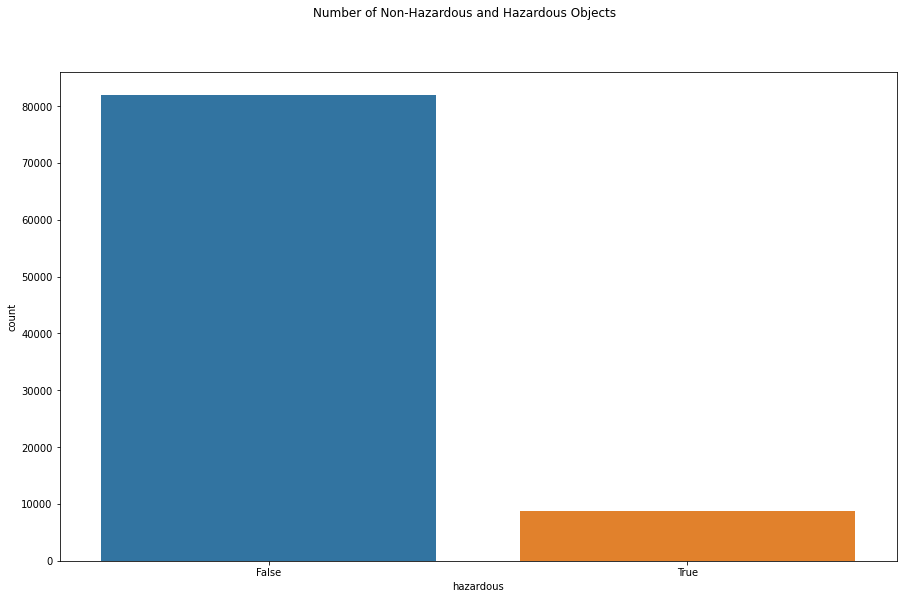

In [49]:
print(df["hazardous"].value_counts() / len(df))

sns.countplot(x='hazardous',data=df)
plt.suptitle('Number of Non-Hazardous and Hazardous Objects')
plt.rcParams['figure.figsize']=[4,4]
plt.show()

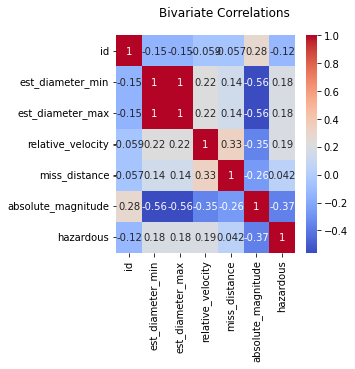

In [50]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.suptitle('Bivariate Correlations')
plt.show()

df.drop(["est_diameter_min"], axis = 1, inplace = True)

In [51]:
df[['drop','temp']]=df.name.str.split('(',expand=True)

df.drop(columns='drop',inplace=True)

def get_year(x):
    return x.strip()[0:x.strip().index(' ')]
df['year']=df['temp'].apply(get_year)
df.drop(columns='temp', inplace=True)

df['year'].unique()


df.loc[df.year=='A911','year']='1911' 
df.loc[df.year=='6743','year']='1960'
df.loc[df.year=='A898','year']='1898'
df.loc[df.year=='6344','year']='1960'
df.loc[df.year=='A924','year']='1924'
df.loc[df.year=='A/2019','year']='2019'
df.loc[df.year=='4788','year']='1960'

df.year.unique()

df.year=df.year.astype(int)

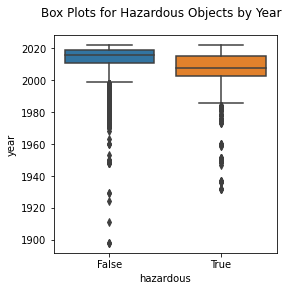

In [52]:
sns.boxplot(x='hazardous',y='year',data=df)
plt.suptitle('Box Plots for Hazardous Objects by Year')
plt.show()

In [53]:
num_cols = ["est_diameter_max", "relative_velocity", "miss_distance", "absolute_magnitude","year"]

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

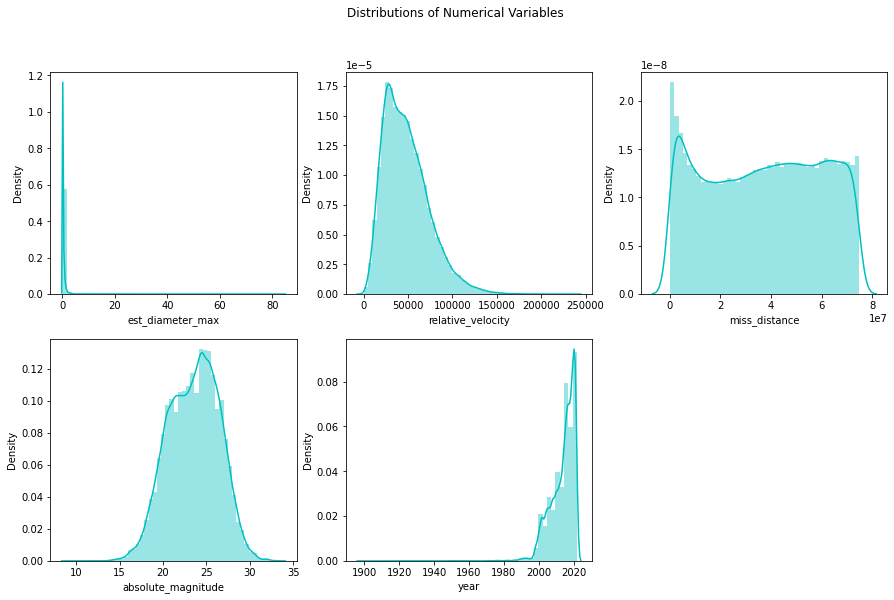

In [54]:
rows=2
cols=3
count=1
plt.rcParams['figure.figsize']=[15,9]
for i in num_cols:
    plt.subplot(rows,cols,count)
    sns.distplot(df[i], color='c')
    count+=1
plt.suptitle('Distributions of Numerical Variables')
plt.show()

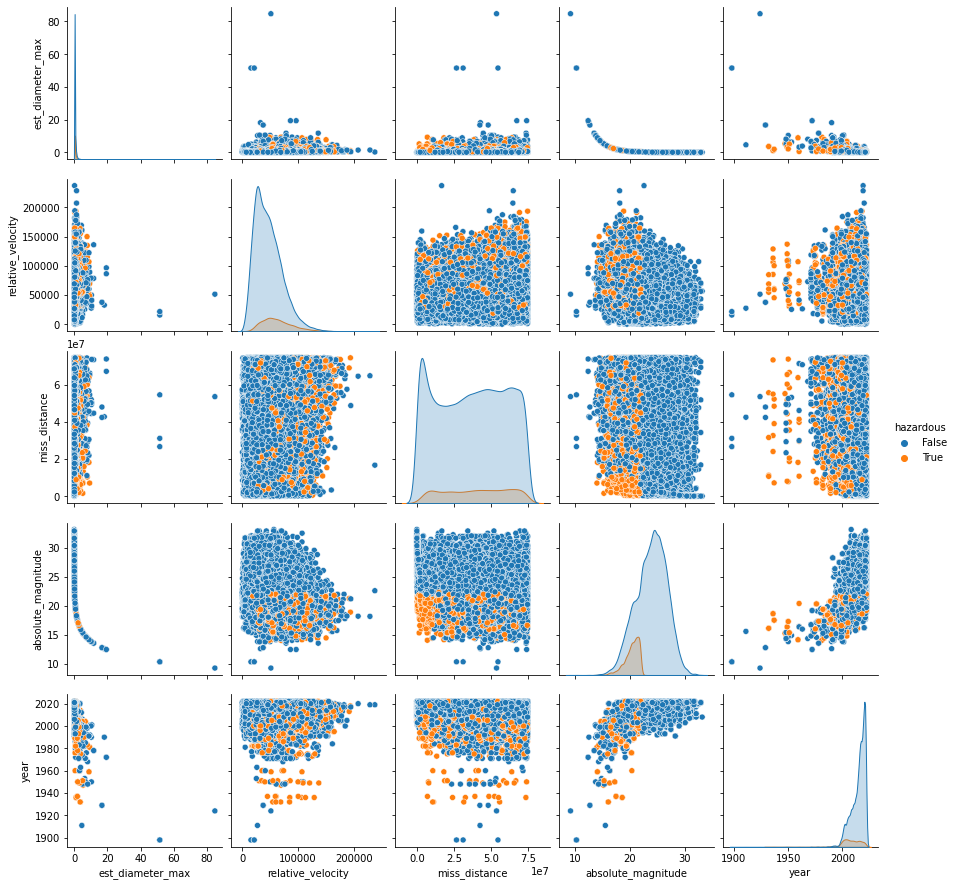

In [55]:
sns.pairplot(df[num_cols+['hazardous']],hue = 'hazardous')

In [56]:
X = df.drop(["id","name","hazardous"], axis=1)
y = df.hazardous.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0, stratify=y)

In [67]:
def roc_curve_plot(y_test, y_scores, method):
    fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend()
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('ROC Curve of ' + method)
    plt.rcParams['figure.figsize']=[6,5]
    plt.show()
    return roc_auc